In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import data_tools as dt

In [2]:
file_path=r"/home/ibrahim/Downloads/data/Warehouse_and_Retail_Sales.csv"
df=pd.read_csv(file_path)

EXPLORING THE DATA
Data seems to be clean without duplicated and missing values.

In [3]:
cols=df.columns
df.columns=dt.df_col(df.columns,max_length=12)
key=pd.DataFrame({"col_names":df.columns,"key":cols})
key

,col_names,key
0,year,YEAR
1,month,MONTH
2,supplier,SUPPLIER
3,item_code,ITEM CODE
4,id,ITEM DESCRIPTION
5,item_type,ITEM TYPE
6,retail_sales,RETAIL SALES
7,rt,RETAIL TRANSFERS
8,ws,WAREHOUSE SALES


In [4]:
df.head()

,year,month,supplier,item_code,id,item_type,retail_sales,rt,ws
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.0
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.0
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.0
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.0


In [5]:
df.tail()

,year,month,supplier,item_code,id,item_type,retail_sales,rt,ws
307640,2020,9,DOPS INC,97896,ST PETERS ORGANIC ENG ALE NR 12/CS - 16.9OZ,BEER,0.00,0.0,1.00
307641,2020,9,ANHEUSER BUSCH INC,97918,STELLA ARTOIS 2/12 NR - 11.2OZ,BEER,372.45,315.0,3586.88
307642,2020,9,HEINEKEN USA,97942,TECATE 4/6 LNNR - 12OZ,BEER,7.79,0.0,4.00
307643,2020,9,RELIABLE CHURCHILL LLLP,97950,S SMITH WINTER WELCOME NR 12/CS - 18.7OZ,BEER,0.00,0.0,2.00
307644,2020,9,RELIABLE CHURCHILL LLLP,97969,S SMITH WINTER WELCOME 4/6NR - 12OZ,BEER,0.00,0.0,1.00


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307645 entries, 0 to 307644
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          307645 non-null  int64  
 1   month         307645 non-null  int64  
 2   supplier      307478 non-null  object 
 3   item_code     307645 non-null  object 
 4   id            307645 non-null  object 
 5   item_type     307644 non-null  object 
 6   retail_sales  307642 non-null  float64
 7   rt            307645 non-null  float64
 8   ws            307645 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 21.1+ MB


In [7]:
df.isnull().sum()

year              0
month             0
supplier        167
item_code         0
id                0
item_type         1
retail_sales      3
rt                0
ws                0
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df[df.duplicated()==True].count()

year            0
month           0
supplier        0
item_code       0
id              0
item_type       0
retail_sales    0
rt              0
ws              0
dtype: int64

DATA ANALYSIS
Exploring some of the features of the data

In [10]:
df.describe()

,year,month,retail_sales,rt,ws
count,307477.000000,307477.000000,307477.000000,307477.000000,307477.000000
mean,2018.438238,6.424064,7.003644,6.938177,25.375561
std,1.083080,3.461853,30.387012,30.244239,249.500572
min,2017.000000,1.000000,-6.490000,-38.490000,-4996.000000
25%,2017.000000,3.000000,0.000000,0.000000,0.000000
50%,2019.000000,7.000000,0.320000,0.000000,1.000000
75%,2019.000000,9.000000,3.260000,3.000000,5.000000
max,2020.000000,12.000000,1816.490000,1990.830000,18317.000000


In [11]:
df["item_type"].unique()

array(['WINE', 'BEER', 'LIQUOR', 'STR_SUPPLIES', 'KEGS', 'REF',
       'NON-ALCOHOL', 'DUNNAGE'], dtype=object)

In [12]:
len(df["supplier"].unique())

396

In [13]:
df["item_type"].value_counts()

item_type
WINE            187640
LIQUOR           64910
BEER             42413
KEGS             10146
NON-ALCOHOL       1899
STR_SUPPLIES       318
REF                 79
DUNNAGE             72
Name: count, dtype: int64

In [19]:
item=[]
count=[]
for i in df["item_type"].unique():
    item.append(i)
    count.append(df[df["item_type"]==i]["item_type"].count())

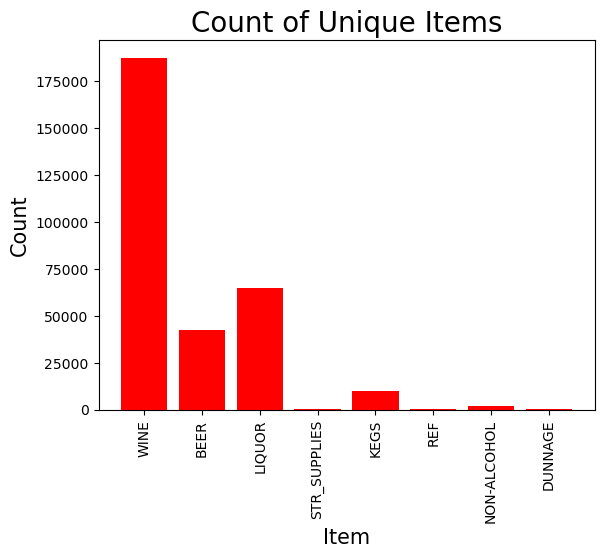

In [24]:
plt.bar(item,count,color='red')
plt.title("Count of Unique Items",fontsize=20)
plt.xlabel("Item",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.xticks(rotation=90)
plt.show()